** Optimization of NMS treshold**

In [1]:
# show images inline
%matplotlib inline
from mmdet.apis import init_detector, inference_detector
import mmcv
import matplotlib.pyplot as plt

# import miscellaneous modules
import cv2
import os
import numpy as np
import time

# Import the functions needed for the optimization
from read_test_data import read_test_data
from run_prediction import run_prediction
from diff_thres_inf_model import diff_thres_inf_model
from TP_FP_FN import TP_FP_FN
from metrics import *
from nms import nms
from filter_score import filter_score

Build the inference model with different NMS threshold 

In [2]:
thresholds = np.linspace(0,1, 100)
scores = np.linspace(0.5, 1.0, 100)

Run the different models and compute the CSI for each threshold:

In [3]:
CSIs = list()
FARs = list()
PODs = list()
SRs = list()
counterspercentages = list()
config_file = '/home/datres/Catchme/mmdetection/configs/vfnet/vfnet_r50_fpn_mdconv_c3-c5_mstrain_2x_coco.py'
checkpoint_file = '/data0/work_dirs/VFNet/epoch_40.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')
pathTrue = '/data0/Catchme/dataset/16_03_2021/validation_evaluation.csv'
save_pred_name = 'pred_no_nms'

Use load_from_local loader


In [4]:
# Uncomment only if you need to do the prediction 
try: 
    os.remove(save_pred_name)
except: 
    pass 

test_data_paths = read_test_data(pathTrue, patch=False)
for el in test_data_paths:
    print(el)
    
    try:
        run_prediction(model, el, save_pred_name)
    except:
        print("Error on img: ",el)

/data0/Catchme/dataset/16_03_2021/images/20201217_catchme-pergher_a__roverè_luna_31_7__2_.jpg
/data0/Catchme/dataset/16_03_2021/images/20201205_catchme-besenello-dx2.jpg
/data0/Catchme/dataset/16_03_2021/images/20201221_francesco_nardelli_4_7__1_.jpg
/data0/Catchme/dataset/16_03_2021/images/20201205_catchme-molini-sx2__2_.jpg
/data0/Catchme/dataset/16_03_2021/images/20201031_catchme-francesconi_m_-_sx_1_.jpg
/data0/Catchme/dataset/16_03_2021/images/20201031_catchme-ferrarri_sas_-_dx_4_.jpg
/data0/Catchme/dataset/16_03_2021/images/20201212_catchme-ravazzone-dx1.jpg
/data0/Catchme/dataset/16_03_2021/images/20201205_catchme-terranera-dx2.jpg
/data0/Catchme/dataset/16_03_2021/images/20201217_catchme-fracchetti_fontana_avio_28_7__4_.jpg
/data0/Catchme/dataset/16_03_2021/images/20201212_catchme-sabbondio__4_.jpg
/data0/Catchme/dataset/16_03_2021/images/20201212_catchme-ischia__2_.jpg
/data0/Catchme/dataset/16_03_2021/images/20201205_catchme-pozze-dx2.jpg
/data0/Catchme/dataset/16_03_2021/ima

**NMS threshold optimazer**

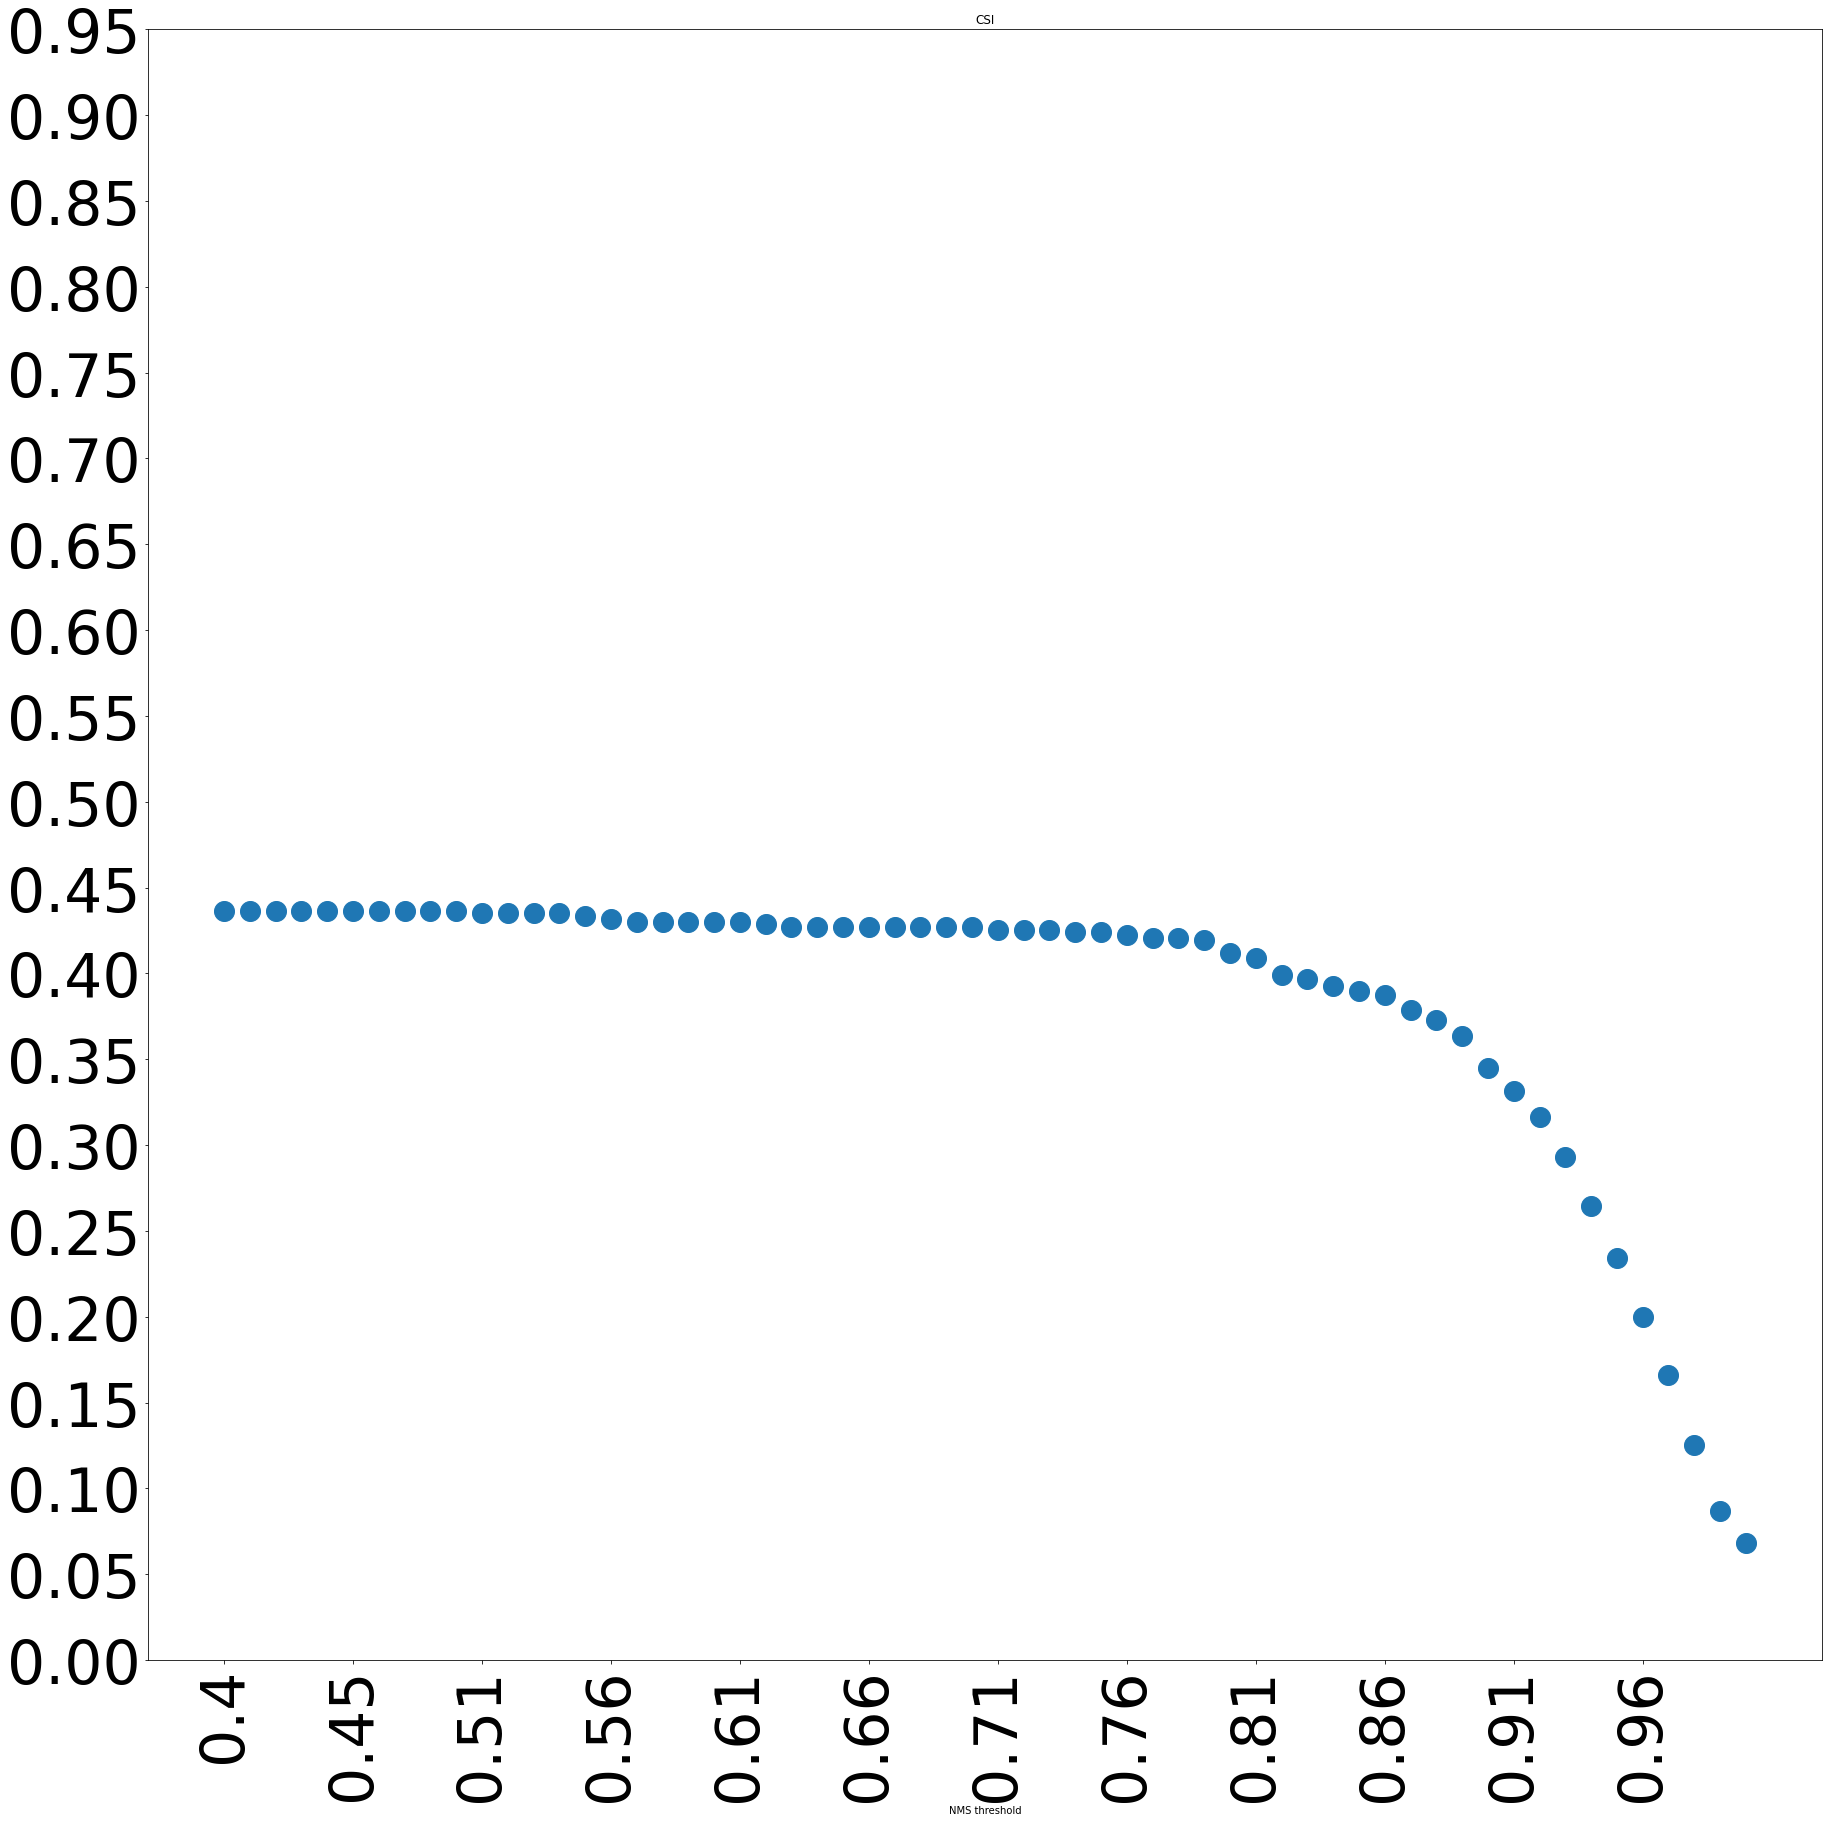

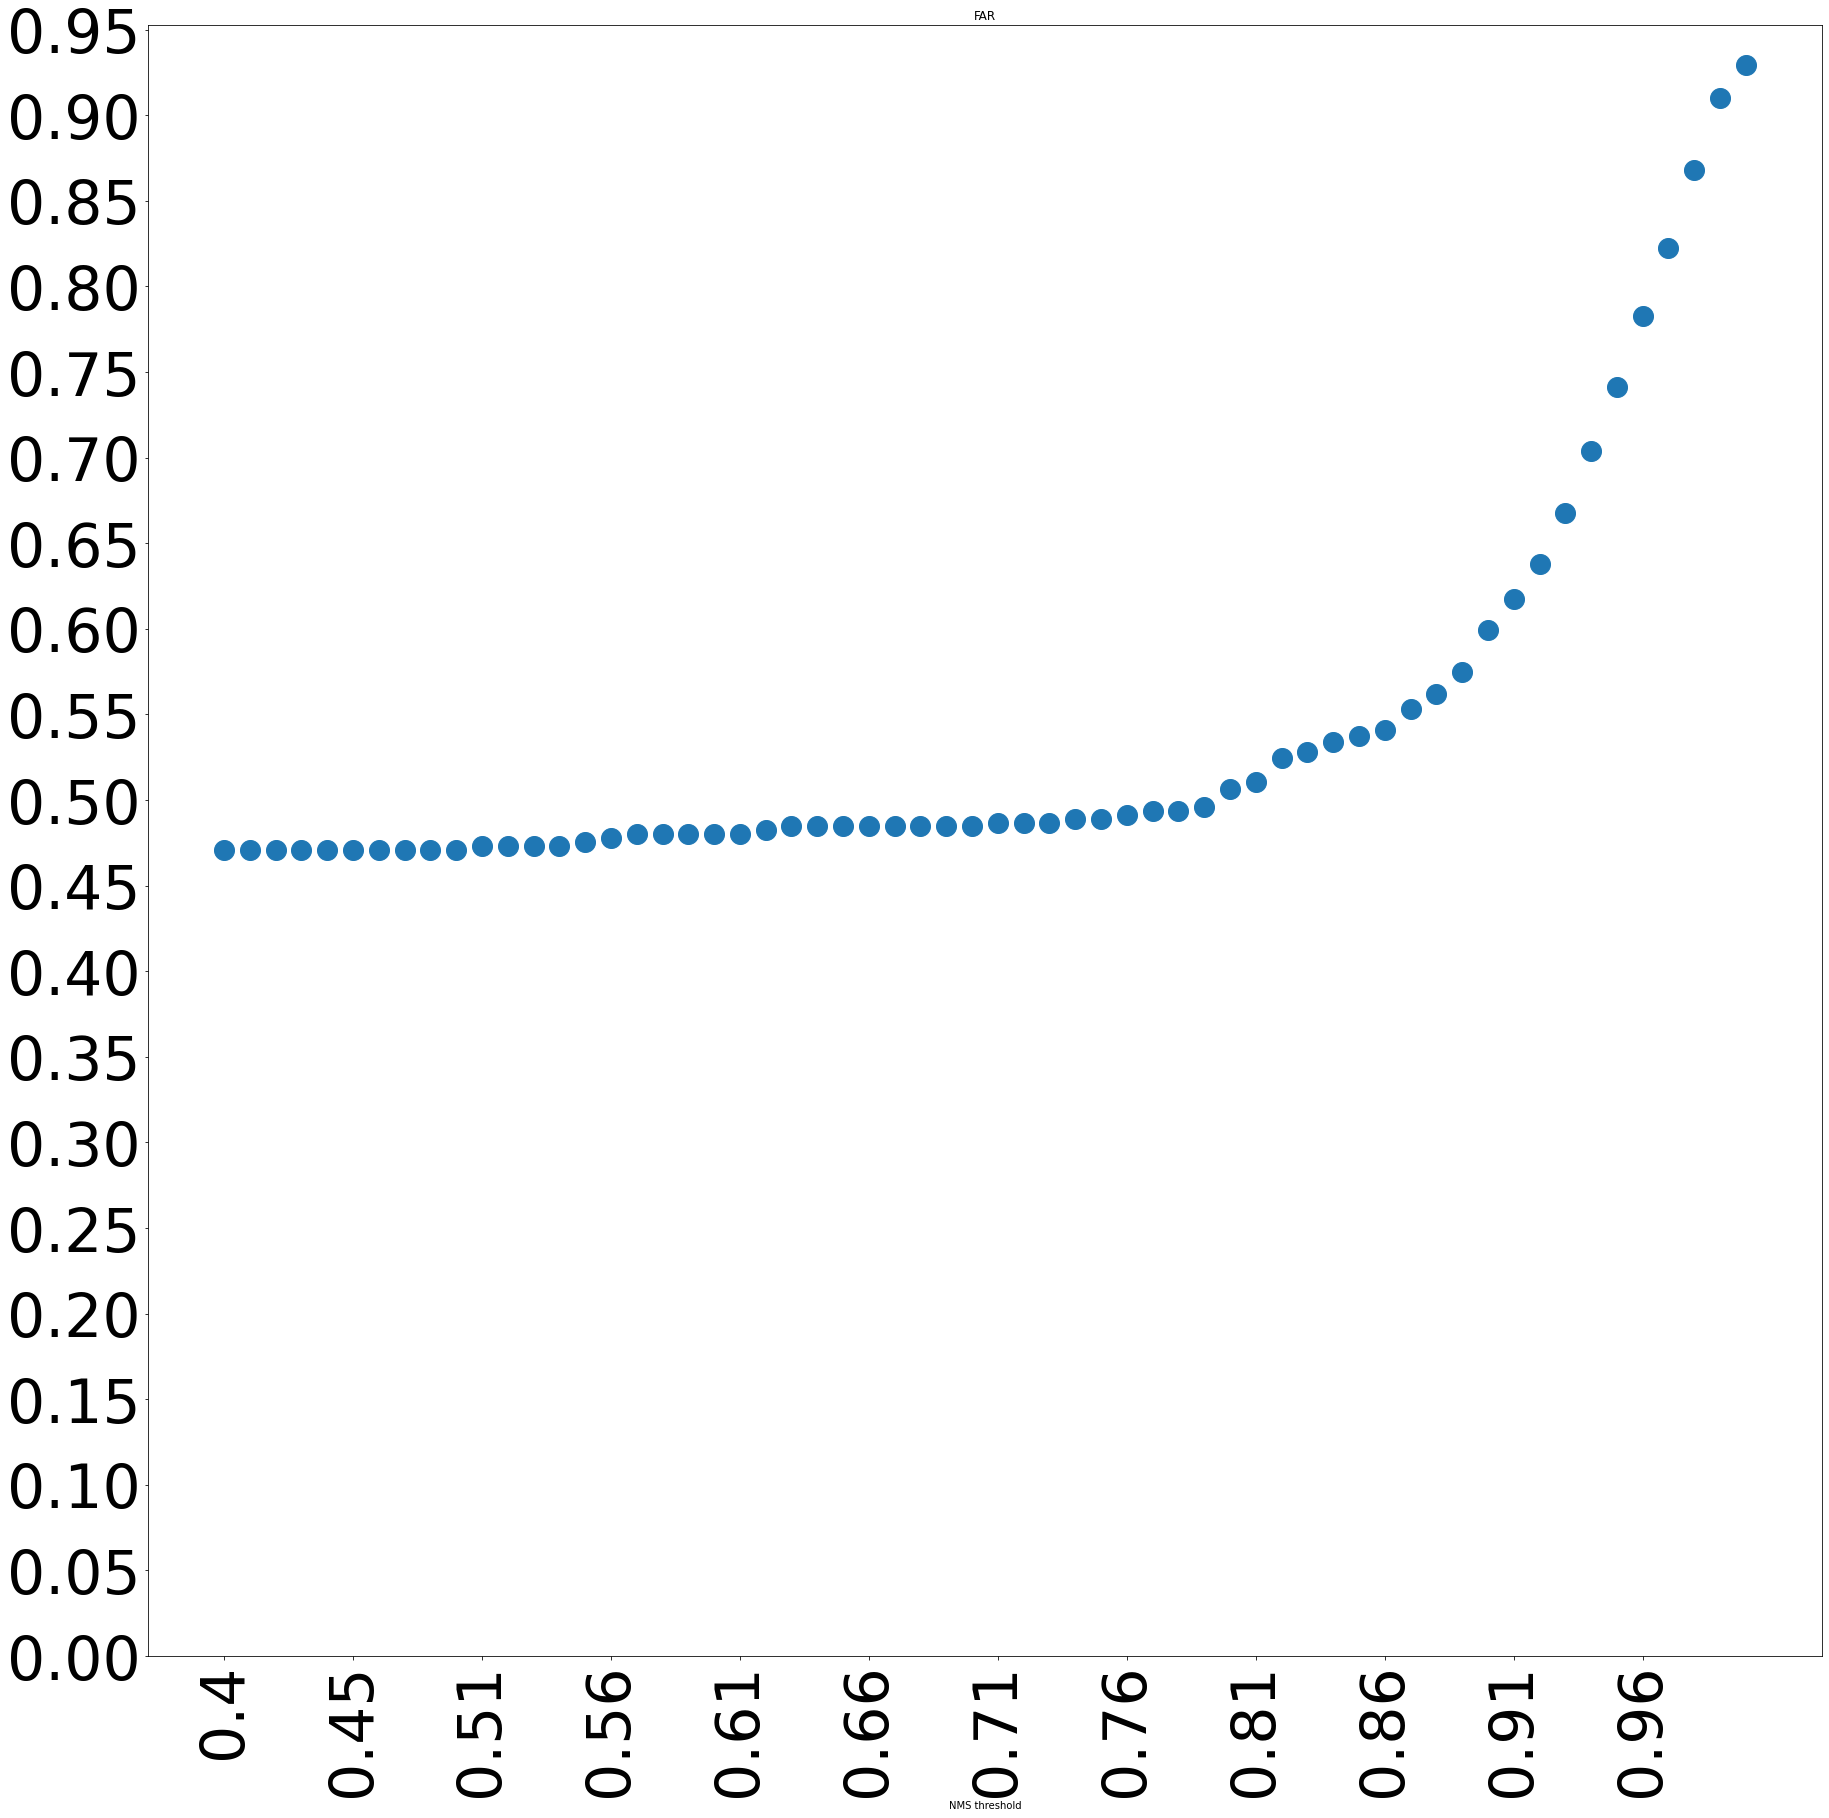

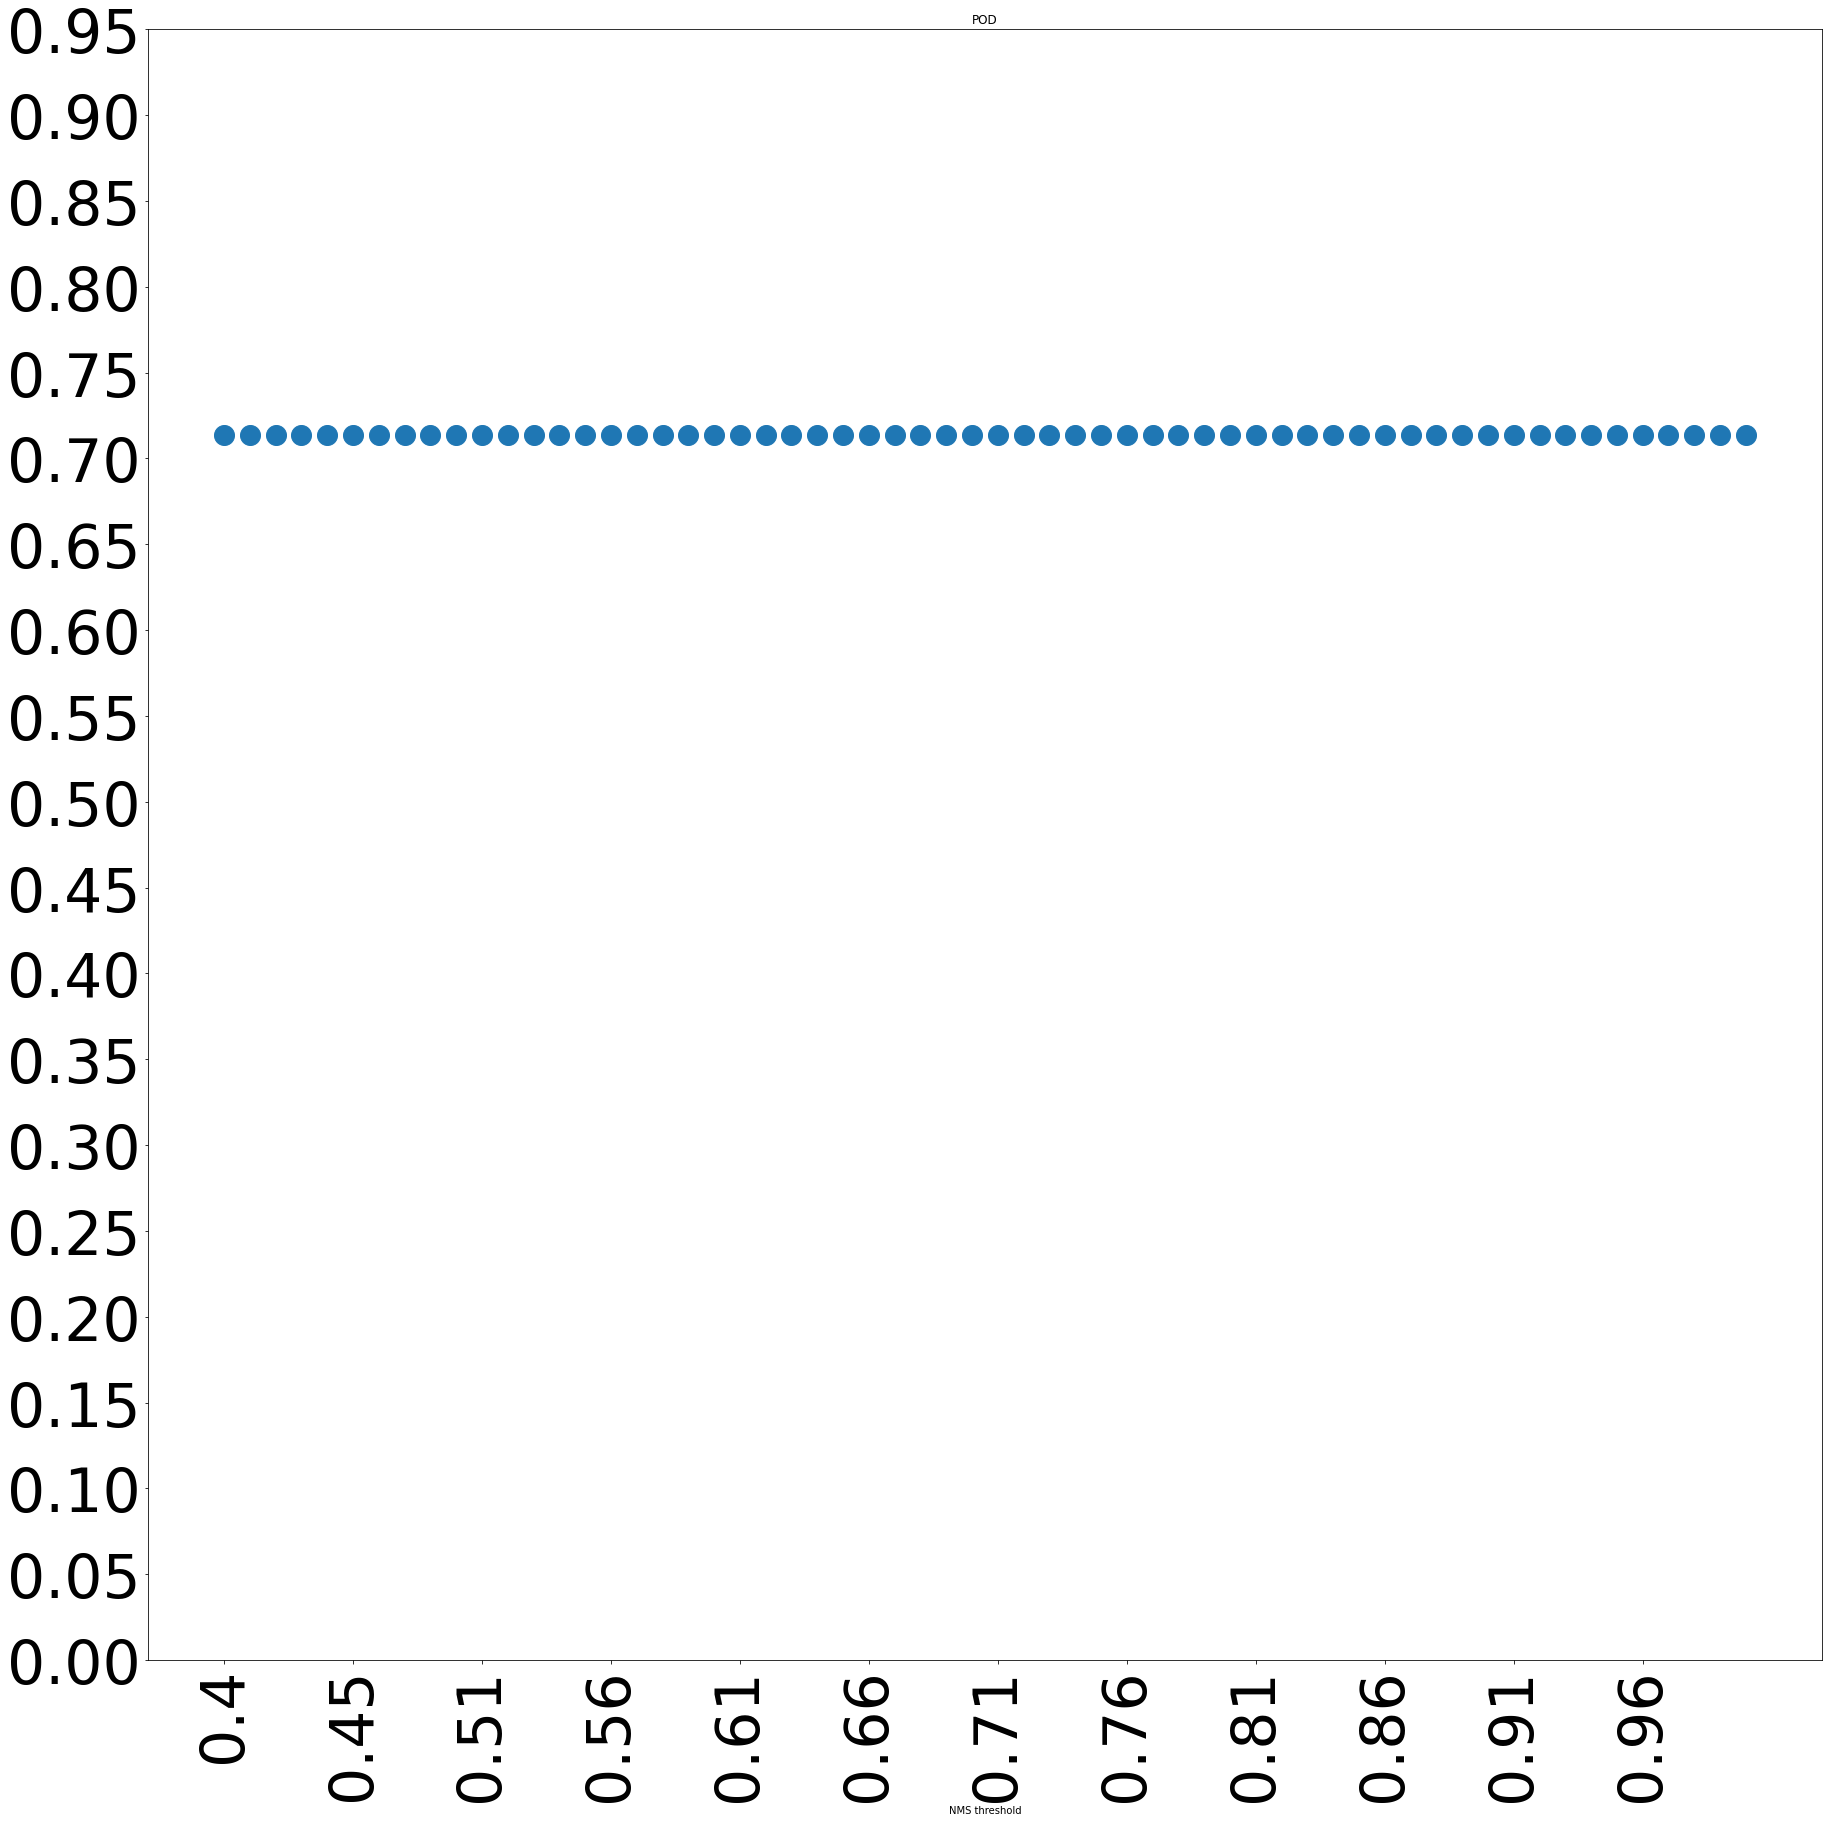

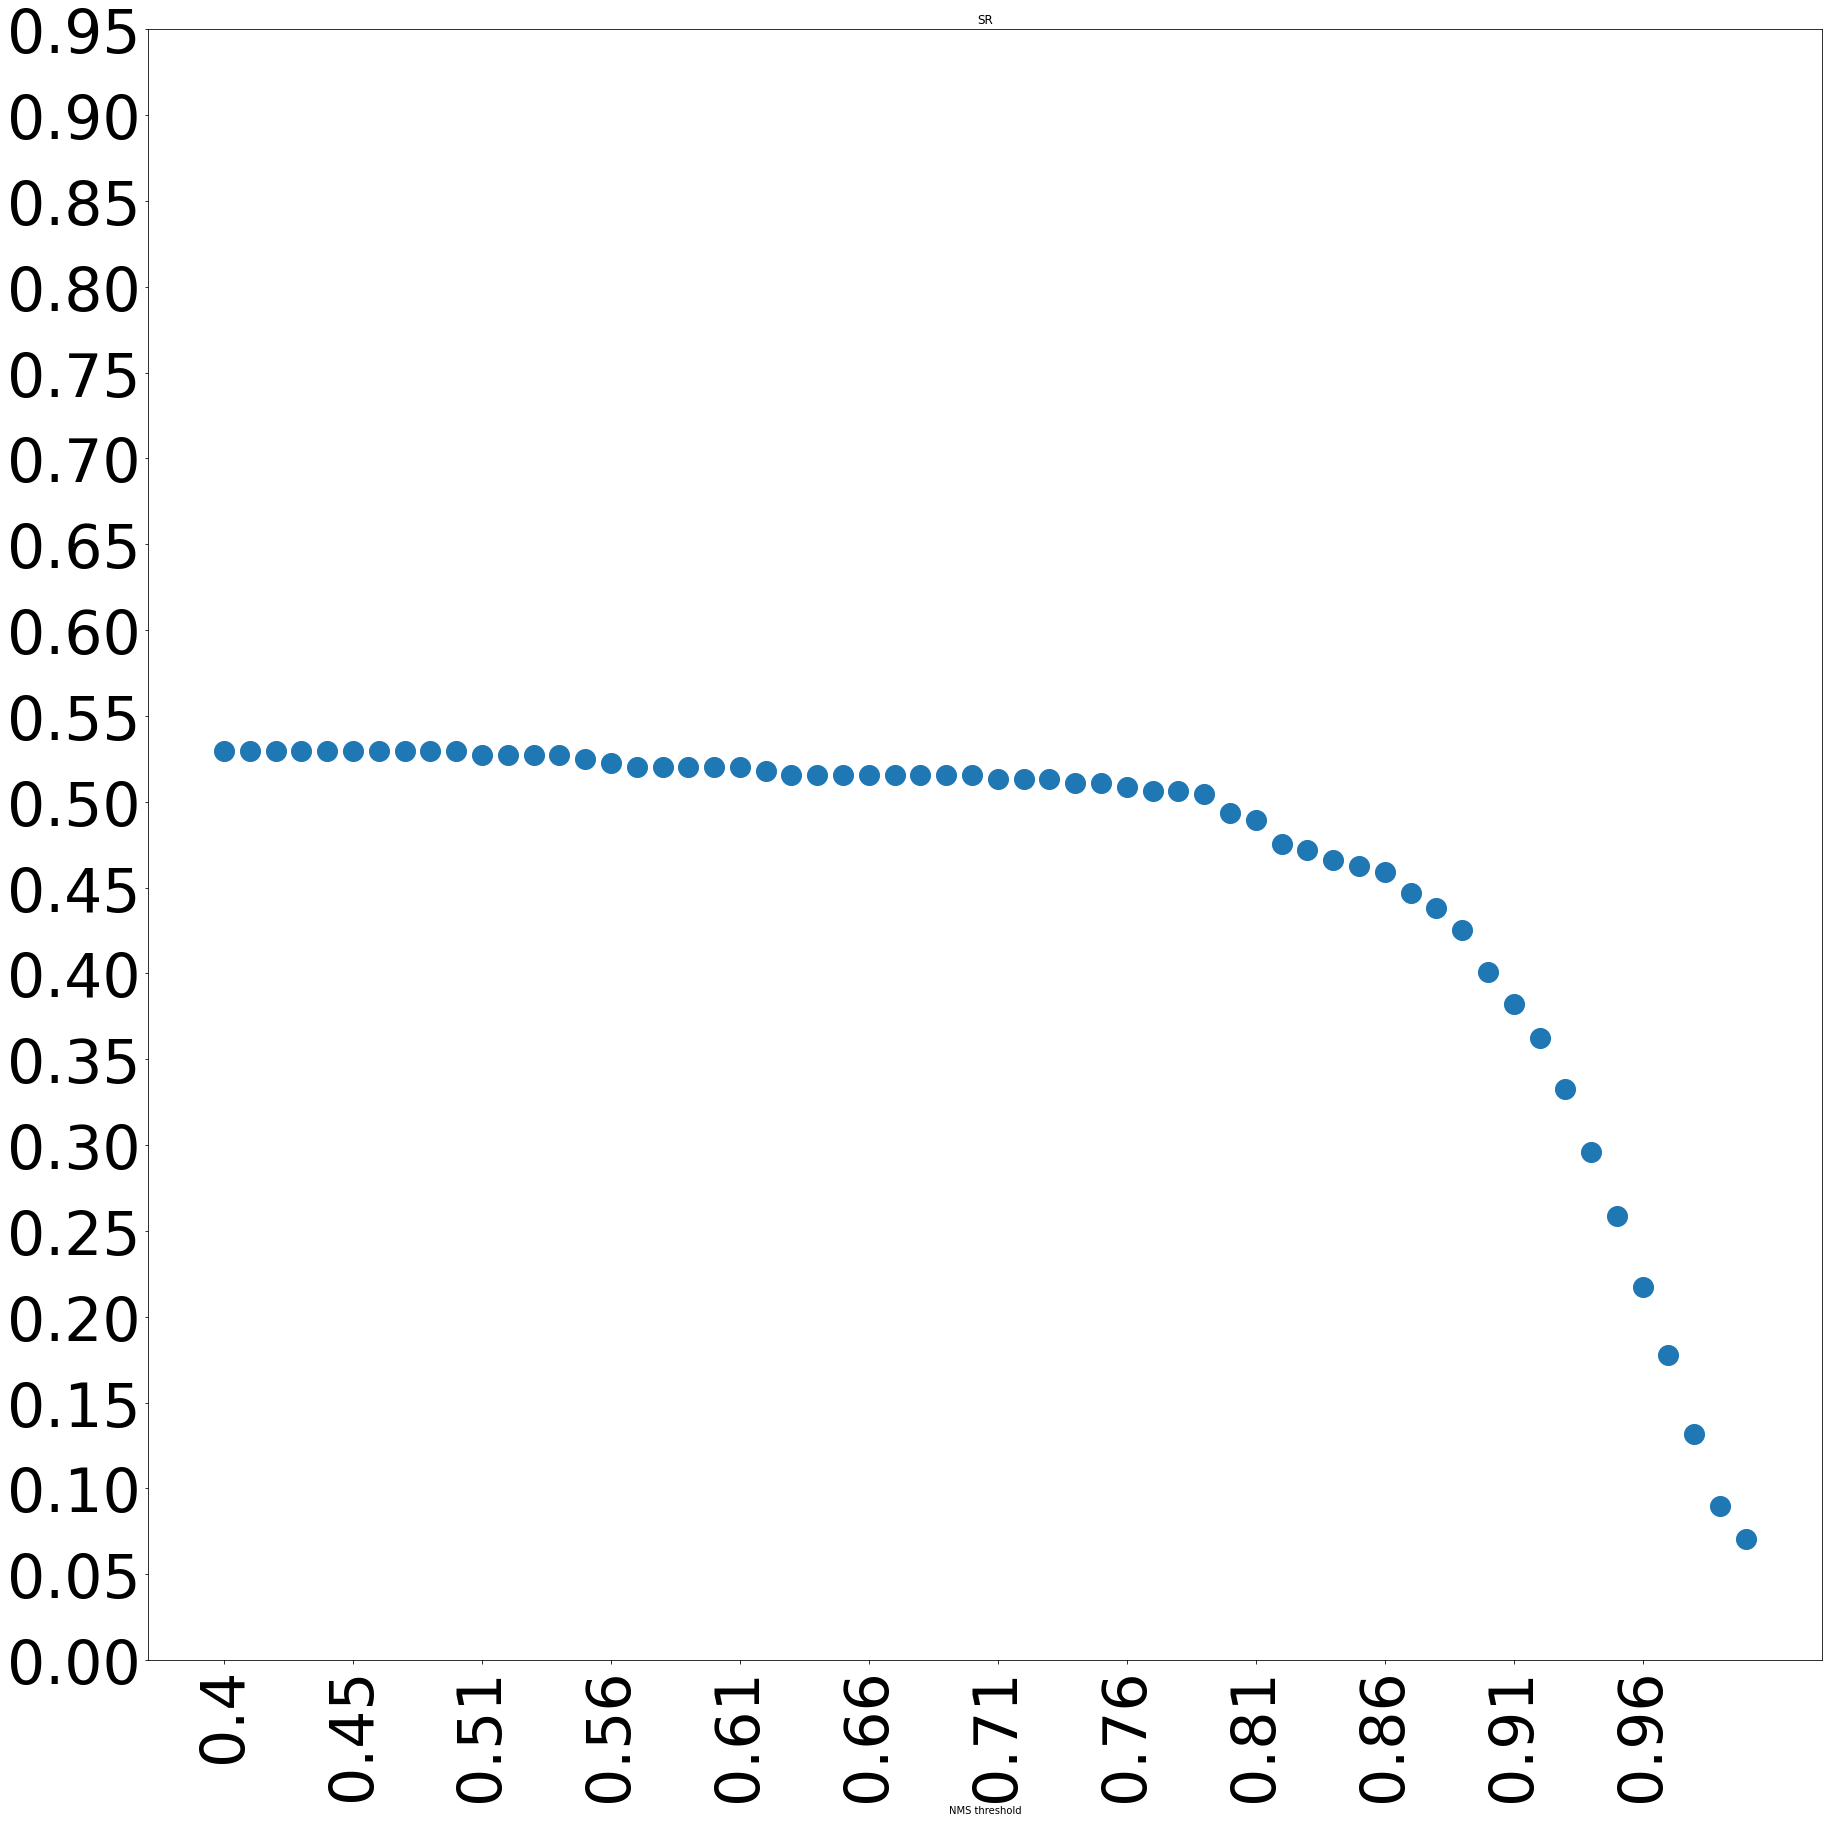

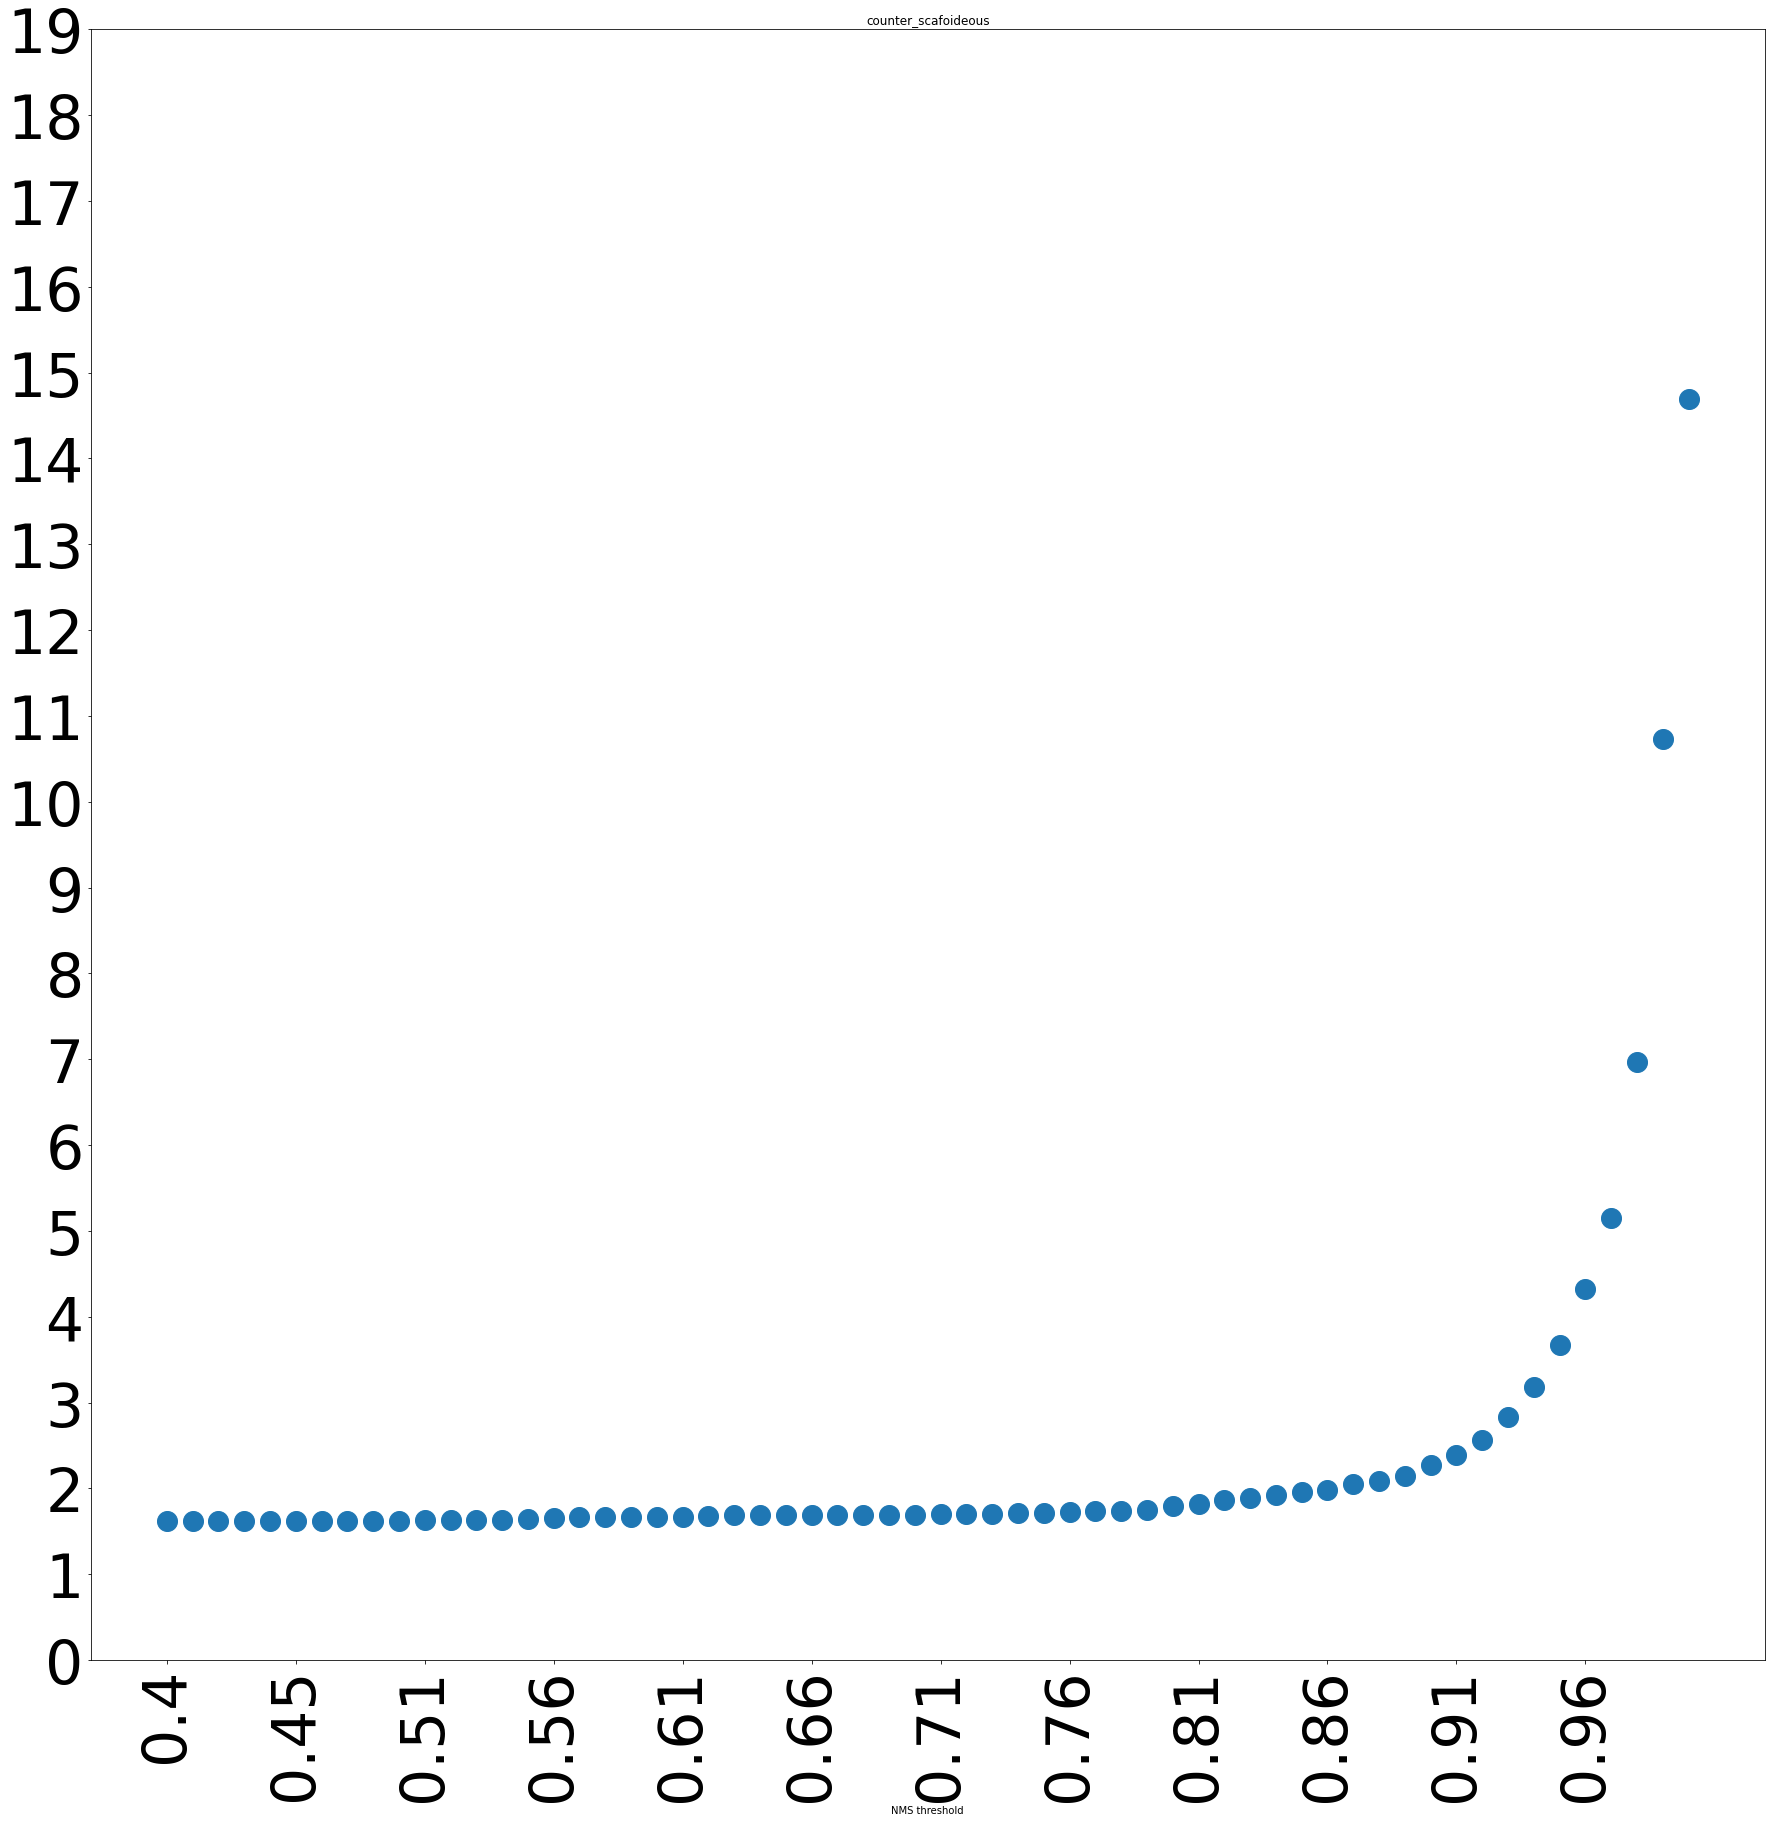

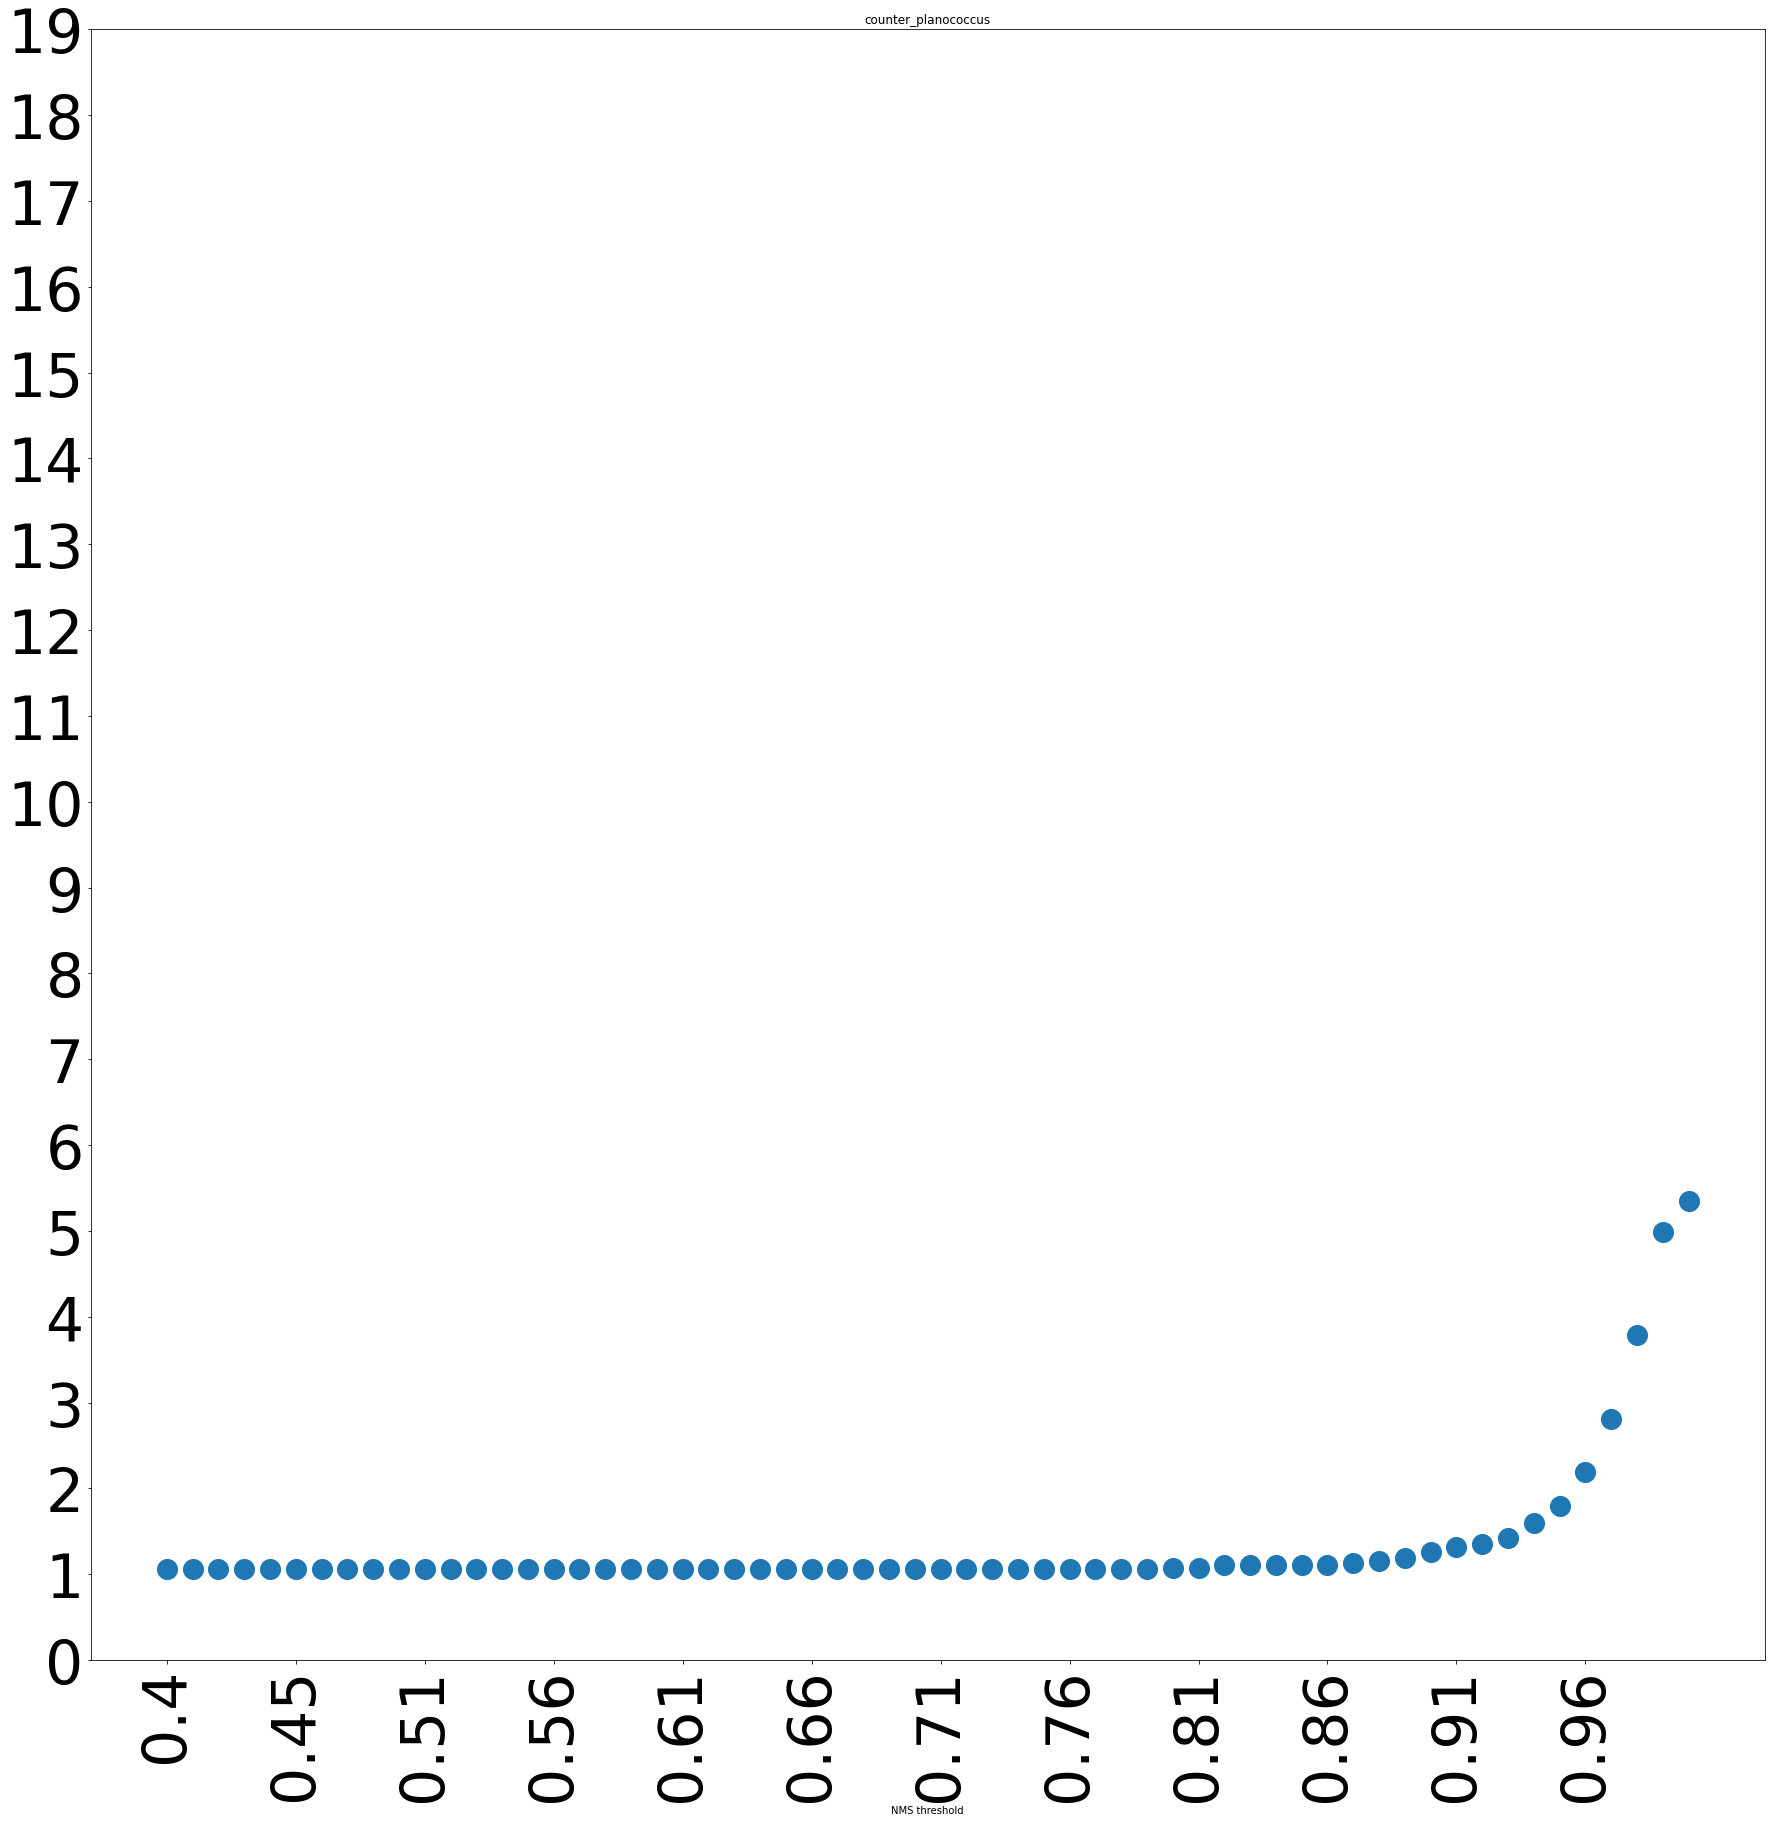

In [5]:
'''
# Filter based on score
try: 
    os.remove('score_pred')
except: 
    pass

score_thres = scores[ind_max]
score_pred = 'score_pred'
filter_score(save_pred_name, score_pred, score_thres)
'''

for t in thresholds: 
    os.remove('nms_pred')
    nms("pred_no_nms", t)
    pathPred = 'nms_pred' 
    csi = CSI(pathTrue, "nms_pred", 0.5, patch=False)
    far = FAR(pathTrue, "nms_pred", 0.5, patch=False)
    pod = POD(pathTrue, "nms_pred", 0.5, patch=False)
    sr = SR(pathTrue, "nms_pred", 0.5, patch=False)
    cp = countersPercentage(pathTrue, pathPred)
    FARs.append(far)
    PODs.append(pod)
    SRs.append(sr)
    counterspercentages.append(cp)
    CSIs.append(csi)

xi = list(range(len(thresholds)))
name_tr = [round(t,2) for t in thresholds]

plot1 = plt.figure(1, figsize=(30,30))
plt.plot(xi[40:], CSIs[40:],'o',  markersize=20)
plt.xlabel('NMS threshold')
plt.title('CSI')
plt.xticks(xi[40:100:5], name_tr[40:100:5], fontsize = 60, rotation='vertical')
plt.yticks(np.arange(0,1,0.05), fontsize = 60)
plt.savefig('CSI.jpg', bbox_inches='tight')



plot2 = plt.figure(2,figsize=(30,30))
plt.plot(xi[40:], FARs[40:],'o', markersize=20)
plt.xlabel('NMS threshold')
plt.title('FAR')
plt.xticks(xi[40:100:5], name_tr[40:100:5], fontsize = 60, rotation='vertical')
plt.yticks(np.arange(0,1,0.05), fontsize = 60)
plt.savefig('FAR.jpg', bbox_inches='tight')

plot3 = plt.figure(3, figsize=(30,30))
plt.plot(xi[40:], PODs[40:],'o', markersize=20)
plt.xlabel('NMS threshold')
plt.yticks(np.arange(0,1,0.05), fontsize = 60)
plt.title('POD')
plt.xticks(xi[40:100:5], name_tr[40:100:5], fontsize = 60, rotation='vertical')
plt.savefig('POD.jpg', bbox_inches='tight')


plot4 = plt.figure(4, figsize=(30,30))
plt.plot(xi[40:], SRs[40:],'o', markersize=20)
plt.xlabel('NMS threshold')
plt.title('SR')
plt.xticks(xi[40:100:5], name_tr[40:100:5], fontsize = 60, rotation='vertical')
plt.yticks(np.arange(0,1,0.05), fontsize = 60)
plt.savefig('SR.jpg', bbox_inches='tight')

counterspercentagesScaf = [a['scafoideus_titanus'] for a in counterspercentages]
counterspercentagesPlan = [a['planococcus_ficus_m'] for a in counterspercentages]

plot5 = plt.figure(5, figsize=(30,30))
plt.plot(xi[40:], counterspercentagesScaf[40:],'o', markersize=20)
plt.xlabel('NMS threshold')
plt.title('counter_scafoideous')
plt.xticks(xi[40:100:5], name_tr[40:100:5], fontsize = 60, rotation='vertical')
plt.yticks(np.arange(0,20,1), fontsize = 60)
plt.savefig('scaf.jpg', bbox_inches='tight')

plot6 = plt.figure(6, figsize=(30,30))
plt.plot(xi[40:], counterspercentagesPlan[40:],'o', markersize=20)
plt.xlabel('NMS threshold')
plt.title('counter_planococcus')
plt.xticks(xi[40:100:5], name_tr[40:100:5], fontsize = 60, rotation='vertical')
plt.yticks(np.arange(0,20,1), fontsize = 60)
plt.savefig('plan.jpg', bbox_inches='tight')

plt.show()




**SCORE THRESHOLD OPTIMAZER** 


/anaconda/envs/catchme_mmdet/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


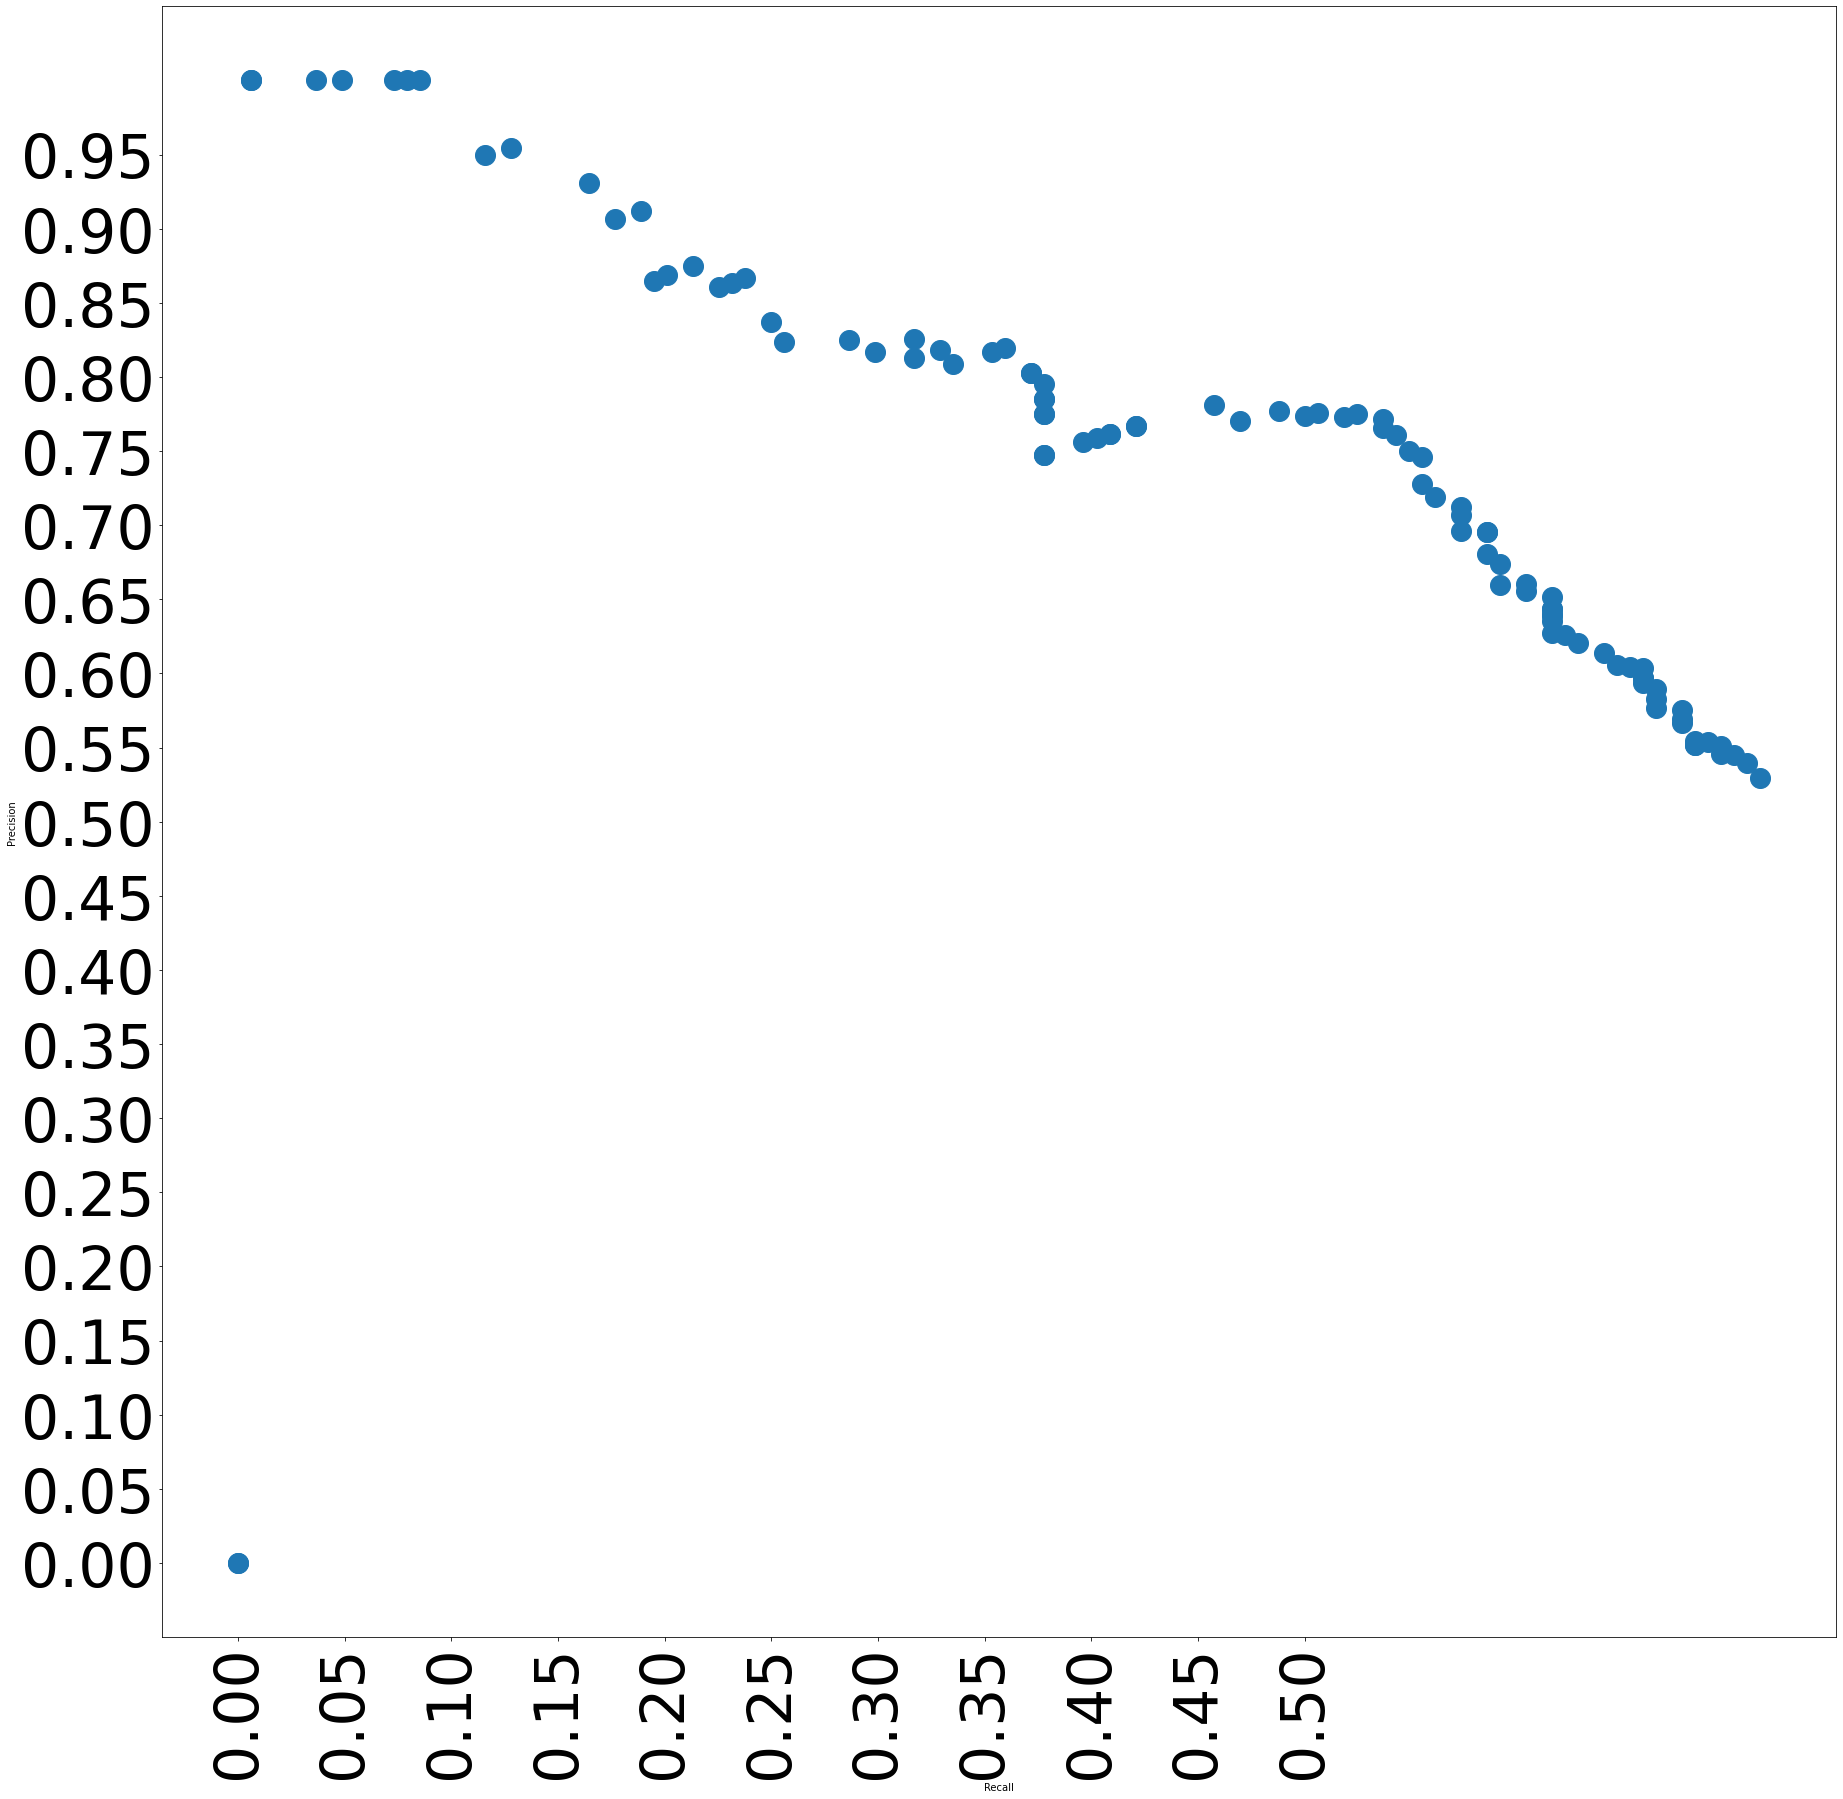

------------------- Model with the best score -----------------------------

The best model is the model with a score_threshold of 0.7171717171717171 with the following statistics:

Precision 50:    0.7459016393442623
Recall 50:    0.5548780487804879


In [6]:
try: 
    os.remove("nms_pred")
except: 
    pass
nms("pred_no_nms", 0.4)

Precision = list()
Rec = list()

for el in scores: 
    try: 
        os.remove('score_optim')
    except: 
        pass
    filter_score("nms_pred", 'score_optim', el)

    prec = PREC(pathTrue, 'score_optim', 0.5)
    rec = REC(pathTrue, 'score_optim', 0.5)
    
    Precision.append(prec)
    Rec.append(rec)
    
mAP = np.array(Precision)
Rec = np.array(Rec)
   
# We maximize the F-Measure
F = np.nan_to_num(2*mAP*Rec/(mAP+Rec))
ind_max = np.argmax(F)

plot5 = plt.figure(5, figsize=(30,30))
plt.plot(Rec.tolist(), mAP.tolist(), 'o', markersize=20)
plt.xlabel("Recall")
plt.yticks(np.arange(0,1,0.05), fontsize = 60)
plt.xticks(np.arange(0,0.55,0.05), fontsize = 60, rotation='vertical')
plt.ylabel("Precision")
plt.savefig('ROC.jpg', bbox_inches='tight')
plt.show()

print('------------------- Model with the best score -----------------------------')
print('')
print('The best model is the model with a score_threshold of ' + str(scores[ind_max]) + ' with the following statistics:')
print('')
print('Precision 50:    ' + str(mAP[ind_max]))
print('Recall 50:    ' + str(Rec[ind_max]))


**IoU Optimizer**

------------------- Best IoU Threshold  -----------------------------

The best IoU threshold in order to make NM close to 1 is 0.0 with CIS of 0.0


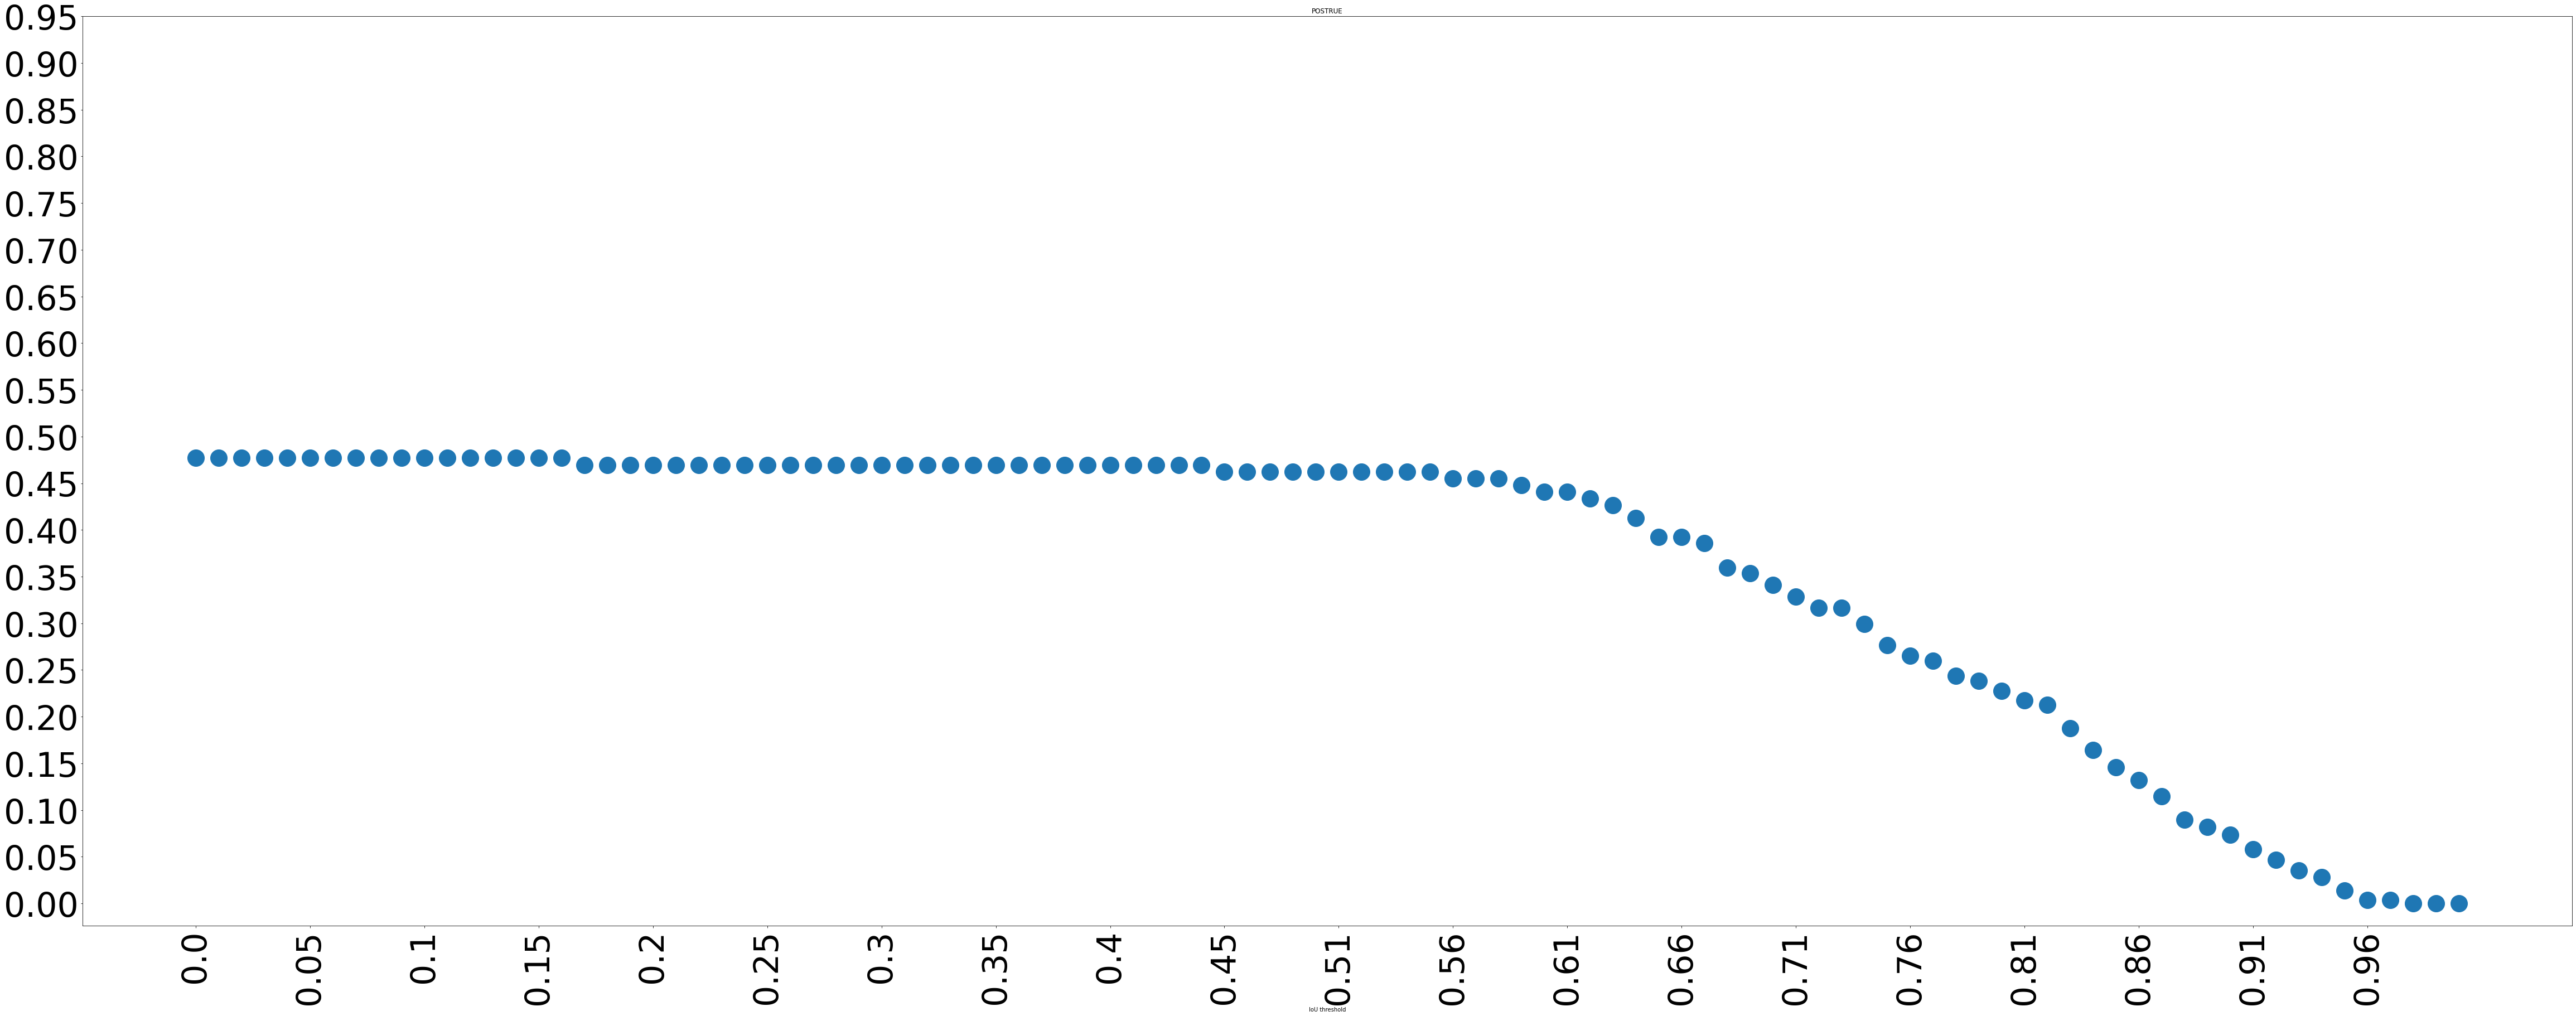

In [7]:
from metrics import postrate

ious = np.linspace(0,1, 100)

try: 
    os.remove("nms_pred")
except: 
    pass
nms("pred_no_nms", 0.4)

try: 
    os.remove('score_optim')
except: 
    pass

filter_score("nms_pred", 'score_optim', 0.71)
postrue = []
for i in ious: 
    ap = CSI(pathTrue, 'score_optim', i)
    postrue.append(ap)

tonp = np.array(postrue)
ind_best = np.argmin(abs(tonp - 1))

    
print('------------------- Best IoU Threshold  -----------------------------')
print('')
print('The best IoU threshold in order to make CSI the highest as possible is ' + str(ious[ind_best]) + 
      ' with CIS of ' + str(ious[ind_best]))
xi = list(range(len(ious)))
plot = plt.figure(1, figsize=(80,30))
plt.plot(xi, postrue,'o', markersize=30)
plt.xlabel('IoU threshold')
plt.title('POSTRUE')
plt.xticks(xi[0:100:5], [round(t,2) for t in thresholds][0:100:5], fontsize = 60, rotation='vertical')
plt.yticks(np.arange(0,1,0.05), fontsize = 60)
plt.savefig('postrue.jpg', bbox_inches='tight')

plt.show()


